In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

In [368]:
def show_prior(measurements, 
               semi_informative_mass=0.997, 
               n=1e5, cut_at_mass=1e-3, 
               include_norm=False,
               include_loguni=False,
               include_exp=False,
               agnostic_bounds=[],
              ):

    n=int(n)
    
    obs = np.array(measurements)
    obs_e = np.log(obs)
    obs_10 = np.log10(obs)

    mean_e = np.mean(obs_e)
    std_e = np.std(obs_e)
    mean_10 = np.mean(obs_10)
    std_10 = np.std(obs_10)

    distr_log_e = sps.norm(loc = mean_e,scale=std_e)
    distr_log_10 = sps.norm(loc = mean_10,scale=std_10)
    min_log = min(distr_log_e.ppf(cut_at_mass),distr_log_10.ppf(cut_at_mass))
    max_log = max(distr_log_e.ppf(1-cut_at_mass),distr_log_10.ppf(1-cut_at_mass))
    x_log = np.linspace(min_log,max_log,n)
    y_log_e = distr_log_e.pdf(x_log)
    y_log_10 = distr_log_10.pdf(x_log)

 
    distr_lin_e = sps.lognorm(s=std_e,scale=np.exp(mean_e))
    distr_lin_10 = sps.lognorm(s=std_10*np.log(10),scale=np.exp(mean_10*np.log(10)))
    min_lin = min(distr_lin_e.ppf(1e-3),distr_lin_10.ppf(1e-3))
    min_lin = 0
    max_lin = max(distr_lin_e.ppf(1-1e-3),distr_lin_10.ppf(1-1e-3))
    x_lin = np.linspace(min_lin,max_lin,n)
    y_lin_e = distr_lin_e.pdf(x_lin)
    y_lin_10 = distr_lin_10.pdf(x_lin)

    mean = np.mean(obs)
    std = np.std(obs)
    if include_norm:
        distr_norm = sps.norm(scale=std, loc=mean)
        y_norm = distr_norm.pdf(x_lin)

    if include_loguni:
        min_lin_loguni = min(distr_lin_e.ppf(1e-3),distr_lin_10.ppf(1e-3))
        distr_loguni = sps.loguniform(min_lin_loguni,max_lin)
        x_lin_loguni = np.linspace(min_lin_loguni, max_lin, n)
        y_loguni = distr_loguni.pdf(x_lin_loguni)


    distr_exp = sps.expon(scale=mean)
    y_exp = distr_exp.pdf(x_lin)

    bounded_area=semi_informative_mass
    lower_log_e = distr_log_e.ppf((1-bounded_area)/2)
    upper_log_e = distr_log_e.ppf(1-(1-bounded_area)/2)
    lower_log_10 = distr_log_10.ppf((1-bounded_area)/2)
    upper_log_10 = distr_log_10.ppf(1-(1-bounded_area)/2)
    lower_lin_e = distr_lin_e.ppf((1-bounded_area)/2)
    upper_lin_e = distr_lin_e.ppf(1-(1-bounded_area)/2)
    lower_lin_10 = distr_lin_10.ppf((1-bounded_area)/2)
    upper_lin_10 = distr_lin_10.ppf(1-(1-bounded_area)/2)
    lower_loglin_e = np.exp(lower_log_e) 
    upper_loglin_e = np.exp(upper_log_e) 
    lower_loglin_10 = 10**(lower_log_10) 
    upper_loglin_10 = 10**(upper_log_10) 

    samps_log_e = np.random.randn(n)*std_e+mean_e
    samps_lin_e = np.exp(samps_log_e)
    samps_log_10 = np.random.randn(n)*std_10+mean_10
    samps_lin_10 = 10**samps_log_10

    fig = plt.figure(figsize=(12,4))
    fig.add_subplot(1,2,1)
    _=plt.hist(samps_log_e, bins=50, color='b', alpha=0.5, density=True,range=[min_log,max_log])
    _=plt.hist(samps_log_10, bins=50, color='g', alpha=0.5, density=True,range=[min_log,max_log])
    plt.plot(x_log,y_log_e,color='b',linestyle='-',alpha=0.5)
    plt.plot(x_log,y_log_10,color='g',linestyle='-',alpha=0.5)
    plt.axvline(lower_log_e, color='b',linestyle=':',alpha=0.5)
    plt.axvline(upper_log_e, color='b',linestyle=':',alpha=0.5)
    plt.axvline(lower_log_10, color='g',linestyle=':',alpha=0.5)
    plt.axvline(upper_log_10, color='g',linestyle=':',alpha=0.5)
    for ob in obs_e:
        plt.plot([ob],[0],'bx',)
    for ob in obs_10:
        plt.plot([ob],[0],'gx',)
    fig.add_subplot(1,2,2)
    _=plt.hist(samps_lin_e, bins=50, color='b', alpha=0.5, range=[min_lin,max_lin], density=True)
    _=plt.hist(samps_lin_10, bins=50, color='g', alpha=0.5, range=[min_lin,max_lin], density=True)
    plt.plot(x_lin,y_lin_e,color='b', linestyle='-',alpha=0.5)
    plt.plot(x_lin,y_lin_10,color='g', linestyle='-',alpha=0.5)
    if include_norm: plt.plot(x_lin,y_norm,color='r', linestyle='--',alpha=0.5)
    if include_exp: 
        plt.plot(x_lin,y_exp,color='c', linestyle='--',alpha=0.5)
        plt.axvline(distr_exp.ppf(semi_informative_mass), color='c',linestyle=':',alpha=0.25)
    if include_loguni: plt.plot(x_lin_loguni,y_loguni,color='m', linestyle='--',alpha=0.5)
    plt.axvline(lower_loglin_e, color='b',linestyle=':',alpha=0.25)
    plt.axvline(upper_loglin_e, color='b',linestyle=':',alpha=0.25)
    plt.axvline(lower_loglin_10, color='g',linestyle=':',alpha=0.25)
    plt.axvline(upper_loglin_10, color='g',linestyle=':',alpha=0.25)
    plt.axvline(lower_lin_e, color='b',linestyle=':',alpha=0.25)
    plt.axvline(upper_lin_e, color='b',linestyle=':',alpha=0.25)
    plt.axvline(lower_lin_10, color='g',linestyle=':',alpha=0.25)
    plt.axvline(upper_lin_10, color='g',linestyle=':',alpha=0.25)
    if len(agnostic_bounds) == 2:
        plt.axvspan(agnostic_bounds[0], agnostic_bounds[1], color='k', alpha=0.1)
    for ob in obs:
        plt.plot([ob],[0],'kx',)
        
    print("mean (log10): {0:.2f} [= log10({1:.2f})]".format(mean_10,10**mean_10))
    print("sigma (log10): {0:.2f}".format(std_10,))
    print()
    print("lower bound (log10): {0:.2f}".format(lower_log_10))
    print("Upper bound (log10): {0:.2f}".format(upper_log_10))
    print()
    print("mean (linear): {0:.2f}".format(mean))
    print("sigma (linear): {0:.2f}".format(std))
    print()
    print("lower bound (linear): {0:.2f}".format(lower_lin_e))
    print("Upper bound (linear): {0:.2f}".format(upper_lin_e))
    print()
    print("Exponential upper bound (linear): {0:.2f}".format(distr_exp.ppf(semi_informative_mass)))





In [340]:
mass = 0.997

In [358]:
10**np.mean(np.log10([36,30,19,7]))

19.46788845089498

### Magnetic field (rms_B)

mean (log10): 1.40 [= log10(25.00)]
sigma (log10): 0.28

lower bound (log10): 0.58
Upper bound (log10): 2.22

mean (linear): 30.21
sigma (linear): 16.96

lower bound (linear): 3.80
Upper bound (linear): 164.47

Exponential upper bound (linear): 175.48


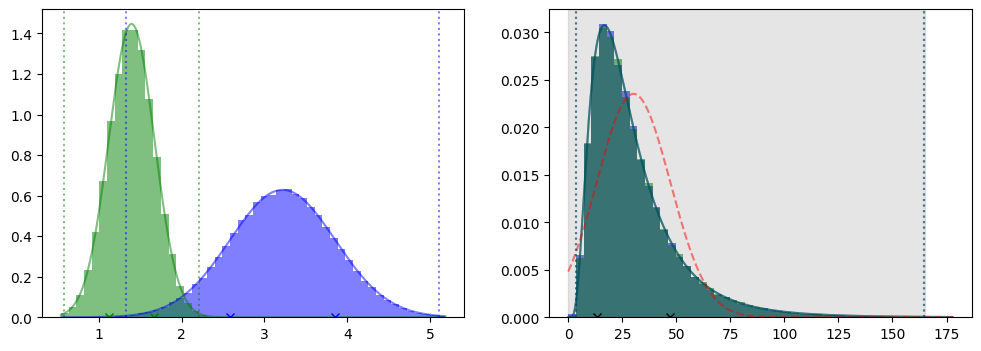

In [369]:
# Magnetic Field (rms_B)
agnostic_bounds = [0,165]
center=25
center_hydra = 10**np.mean(np.log10([36,30,19,7]))
upper_hydra = 10**( np.std(np.log10([36,30,19,7])) + np.log10(center_hydra) ) - center_hydra
lower_hydra = center_hydra - 10**(-np.std(np.log10([36,30,19,7])) + np.log10(center_hydra) )  

obs2 = 0.5*(center/center_hydra)*( upper_hydra+lower_hydra + np.sqrt( (upper_hydra + lower_hydra)**2 + 4*center_hydra**2  )  )
obs1 = (center**2)/obs2
           
show_prior([obs1,obs2], semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)

<u>Agnostic prior</u>: Linear uniform with bounds **[0, 165]** $\mathrm{\mu G}$. 

* Upper limit is dictated by informed prior's $3\sigma$ bounds 
* We are not agnostic about scale, therefore we go for linear rather than log.
  - Otherwise we would be preferring 0-like field-strengths where there is no photon-ALP conversion
* 90 is largest estimate for any cool-core cluster (Hydra A) found in literature (Kuchar). 
* Vacca use prior bounds going up to 70. 
* MAGIC have lower limits going down to 2 depending on assumption of B-e scaling. Therefore doesn't make sense to have a less conservative lower limit? 

<u>Informed prior</u>: Lognormal with (mu,sigma) = **(1.40, 0.28)**

* We use the Perseus measurment as the mean of log10(B)
* We use Hydra A measurements to find the variance of log10(B)
* However, we scale the variance such that the smallest 68% probability mass-interval of the log-normal distribution has the same relative size (w.r.t. the mode) for both Hydra and Perseus.
* The mean and variance are computed from most likely estimates on similar cooling core clusters_
  - 25 $\mathrm{\mu G}$ for Perseus (Taylor). No uncertainties. Not clear what other assumptions are... 
  - 36 $\mathrm{\mu G}$ for Hydra A (Kuchar). Actually varies between 21 and 85, depending on tilt angle of cluster north lobe. Take 36, as it is for the "central" tilt 45◦ (estimates vary between 30◦ and 60◦)
  - 30 $\mathrm{\mu G}$ for Hydra A (Perley)
  - 19 $\mathrm{\mu G}$ for Hydra A (Laing)
  - 7 $\mathrm{\mu G}$ for Hydra A (Vogt2; trumps Vogt1)
  - 11.7 $\mathrm{\mu G}$ for A2199 (Vacca) (not used)


<u>Semi-informed prior</u>: Linear uniform with bounds **[3.8, 165]** $\mathrm{\mu G}$.

* Lower limit is given by informed prior's $3\sigma$ bounds 
* MAGIC have lower limits going down to 2 depending on assumption of B-e scaling.






In [301]:
assumed_sigma = 1

### 1st e-normalization

mean (log10): 1.66 [= log10(46.00)]
sigma (log10): 0.04

lower bound (log10): 1.54
Upper bound (log10): 1.78

mean (linear): 46.21
sigma (linear): 4.35

lower bound (linear): 34.76
Upper bound (linear): 60.88

Exponential upper bound (linear): 268.41


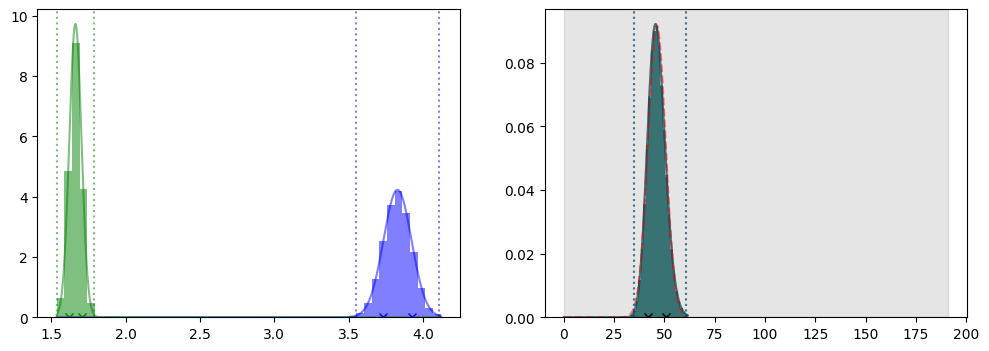

In [395]:
agnostic_bounds = [0,191]
center=0.046*1e3
center_vacca = 0.074
upper_vacca= 0.004
lower_vacca = 0.01

obs2 = 0.5*(center/center_vacca)*( upper_vacca+lower_vacca + np.sqrt( (upper_vacca + lower_vacca)**2 + 4*center_vacca**2  )  )
obs1 = (center**2)/obs2
show_prior([obs1,obs2], semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)

### 2nd e-normalization

mean (log10): 0.62 [= log10(4.16)]
sigma (log10): 0.06

lower bound (log10): 0.43
Upper bound (log10): 0.80

mean (linear): 4.20
sigma (linear): 0.60

lower bound (linear): 2.71
Upper bound (linear): 6.37

Exponential upper bound (linear): 24.40


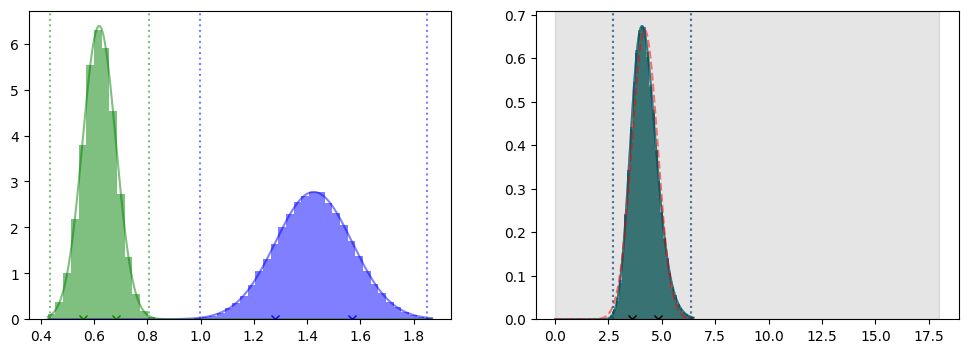

In [416]:
agnostic_bounds = [0,18]
center=0.00405*1e3
center_vacca = 0.027
upper_vacca= 0.003
lower_vacca = 0.003

obs2 = 0.5*(center/center_vacca)*( upper_vacca+lower_vacca + np.sqrt( (upper_vacca + lower_vacca)**2 + 4*center_vacca**2  )  )
obs1 = (center**2)/obs2
# show_prior([obs1,obs2], semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)
show_prior([4.8,3.6], semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)

### 1st e-density parameter (r1)

mean (log10): 1.76 [= log10(57.00)]
sigma (log10): 0.12

lower bound (log10): 1.40
Upper bound (log10): 2.11

mean (linear): 59.16
sigma (linear): 15.83

lower bound (linear): 25.25
Upper bound (linear): 128.66

Exponential upper bound (linear): 343.66


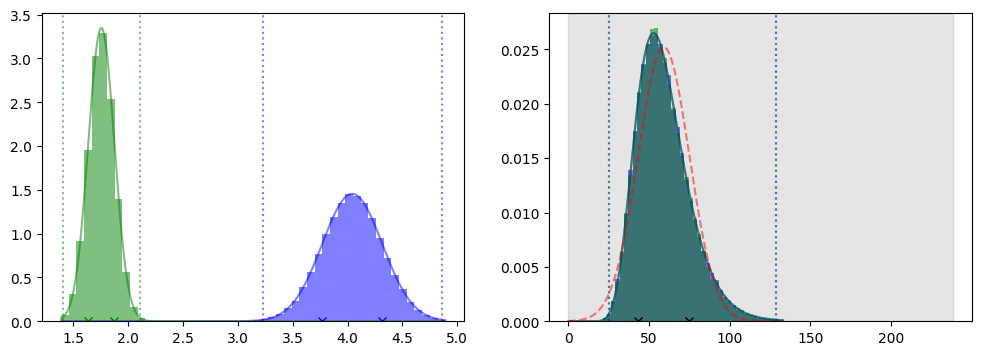

In [417]:
agnostic_bounds = [0,238]
center=57
center_vacca = 9
upper_vacca= 2
lower_vacca = 3

obs2 = 0.5*(center/center_vacca)*( upper_vacca+lower_vacca + np.sqrt( (upper_vacca + lower_vacca)**2 + 4*center_vacca**2  )  )
obs1 = (center**2)/obs2
show_prior([obs1,obs2], semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)

### 2nd e-density parameter (r2)

mean (log10): 2.43 [= log10(268.96)]
sigma (log10): 0.16

lower bound (log10): 1.96
Upper bound (log10): 2.90

mean (linear): 286.83
sigma (linear): 98.90

lower bound (linear): 90.81
Upper bound (linear): 796.62

Exponential upper bound (linear): 1666.26


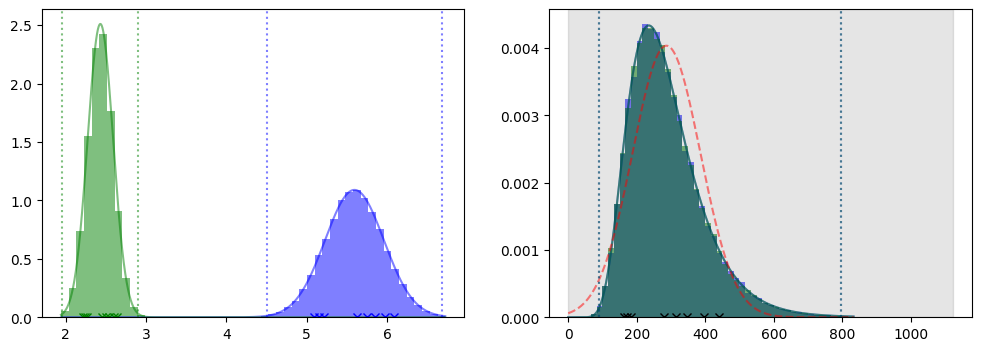

In [418]:
agnostic_bounds = [0,1122]
center=280
center_vacca = 26
upper_vacca= 0.8
lower_vacca = 6

obs2 = 0.5*(center/center_vacca)*( upper_vacca+lower_vacca + np.sqrt( (upper_vacca + lower_vacca)**2 + 4*center_vacca**2  )  )
obs1 = (center**2)/obs2
show_prior(21.8*np.array([20.14,15.85,7.45,7.92,8.47,18.13,12.8,14.5]), semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)

### 3rd e-density parameter (beta1)

mean (log10): 0.08 [= log10(1.20)]
sigma (log10): 0.10

lower bound (log10): -0.22
Upper bound (log10): 0.38

mean (linear): 1.23
sigma (linear): 0.28

lower bound (linear): 0.60
Upper bound (linear): 2.38

Exponential upper bound (linear): 7.16


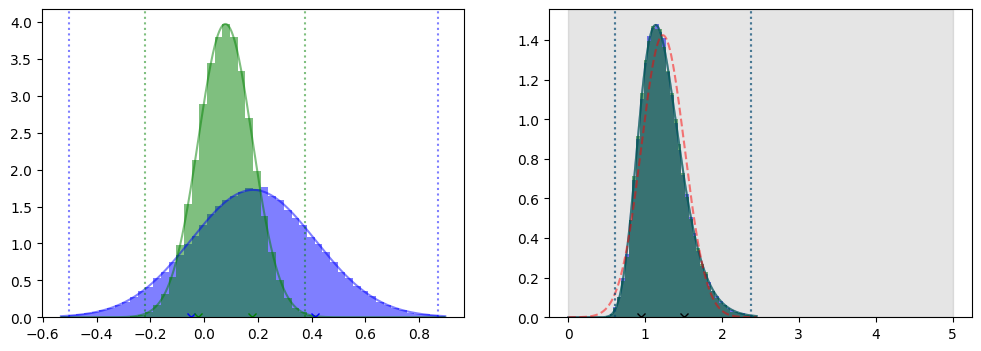

In [379]:
agnostic_bounds = [0,5]
center=1.2
center_vacca = 1.5
upper_vacca= 0.2
lower_vacca = 0.5

obs2 = 0.5*(center/center_vacca)*( upper_vacca+lower_vacca + np.sqrt( (upper_vacca + lower_vacca)**2 + 4*center_vacca**2  )  )
obs1 = (center**2)/obs2
show_prior([obs1,obs2], semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)

### 4th e-density parameter (beta2)

In [409]:
np.mean([3.28,5.18,5.08,5.02,3.01,3.25,2.97,3.25])

3.7636

In [410]:
np.mean([0.4,0.298,0.231,0.194,0.547,0.350,0.282,0.594])

0.362

mean (log10): -0.16 [= log10(0.69)]
sigma (log10): 0.09

lower bound (log10): -0.42
Upper bound (log10): 0.09

mean (linear): 0.70
sigma (linear): 0.14

lower bound (linear): 0.38
Upper bound (linear): 1.24

Exponential upper bound (linear): 4.07


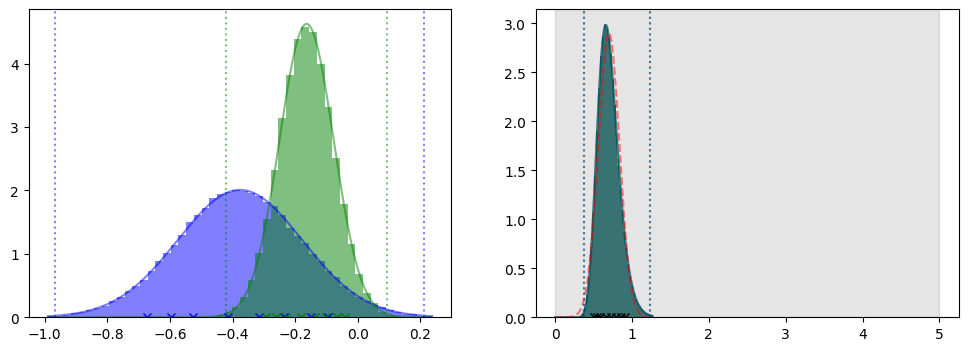

In [419]:
agnostic_bounds = [0,5]
center=0.58
center_vacca = 0.39
upper_vacca= 0.01
lower_vacca = 0.03

obs2 = 0.5*(center/center_vacca)*( upper_vacca+lower_vacca + np.sqrt( (upper_vacca + lower_vacca)**2 + 4*center_vacca**2  )  )
obs1 = (center**2)/obs2
show_prior([0.91,0.86,0.59,0.55,0.51,0.73,0.66,0.79], semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)

### B-e scaling

mean (log10): -0.21 [= log10(0.62)]
sigma (log10): 0.23

lower bound (log10): -0.90
Upper bound (log10): 0.48

mean (linear): 0.70
sigma (linear): 0.31

lower bound (linear): 0.13
Upper bound (linear): 3.04

Exponential upper bound (linear): 4.09


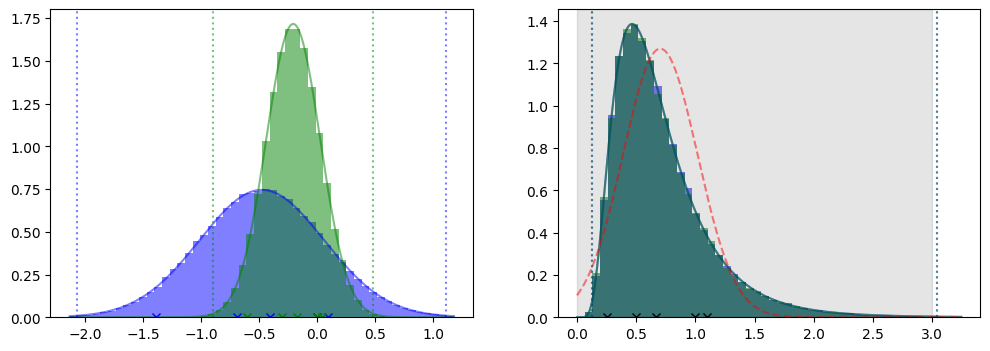

In [428]:
# B-e scaling
agnostic_bounds = [0,3]
show_prior([1, 1.1, 0.25, 0.5, 2/3], semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)

<u>Agnostic prior</u>: Linear uniform with bounds **[,]** . 

* 

<u>Informed prior</u>: Lognormal with (mu,sigma) = **(-0.22, 0.22)**

* Mu and sigma are computed from most likely estimates on similar cooling core clusters_
  - 1 for Hydra A (Kuchar)
  - 0.25 for Hydra A (Laing)
  - 0.5 or 2/3 for Hydra A (Vogt2), depending on assumptions
  - 0.9 for A2199 (Vacca)
  


<u>Semi-informed prior</u>: Same as agnostic

### Max turbulence scale

In [413]:
np.pi*2/35

0.17951958020513104

mean (log10): -0.41 [= log10(0.39)]
sigma (log10): 0.27

lower bound (log10): -1.22
Upper bound (log10): 0.39

mean (linear): 0.48
sigma (linear): 0.31

lower bound (linear): 0.06
Upper bound (linear): 2.47

Exponential upper bound (linear): 2.76


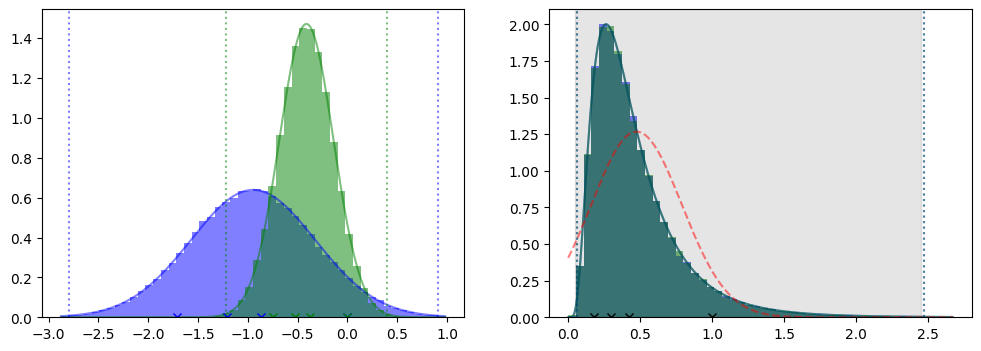

In [427]:
agnostic_bounds = [10**-1.3, 10**0.39]
show_prior([0.42,0.18,1, 0.3], semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)

<u>Agnostic prior</u>: Linear uniform with bounds **[,]** . 

* Variations observed at pc-scale?

<u>Informed prior</u>: Lognormal with (mu,sigma) = **(, )**

* Mu and sigma are computed from most likely estimates on similar cooling core clusters_
  - 0.42 for Hydra A (Kuchar)
  - 0.3 or 1 for Hydra A (Vogt1)
  - $2\pi/35$ = 0.18 for A2199 (Vacca)

  


<u>Semi-informed prior</u>: Same as agnostic

### Min turbulence scale

In [424]:
np.pi*2/0.7

8.975979010256552

mean (log10): 0.93 [= log10(8.43)]
sigma (log10): 0.10

lower bound (log10): 0.62
Upper bound (log10): 1.24

mean (linear): 8.67
sigma (linear): 1.89

lower bound (linear): 4.13
Upper bound (linear): 17.24

Exponential upper bound (linear): 50.35


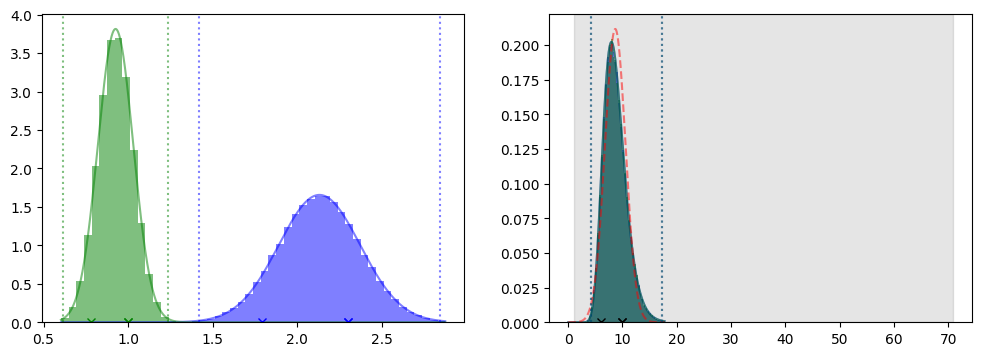

In [425]:
agnostic_bounds = [10**0,10**1.85]
show_prior([10, 6, 10], semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)

<u>Agnostic prior</u>: Linear uniform with bounds **[,]** . 

* 

<u>Informed prior</u>: Lognormal with (mu,sigma) = **(, )**

* Mu and sigma are computed from most likely estimates on similar cooling core clusters_
  - 10 for Hydra A (Kuchar)
  - 10 for Hydra A (Vogt1)
  - $2\pi/0.7$ = 8.98 for A2199 (Vacca)

### Turbulence spectral index

mean (log10): 0.29 [= log10(1.97)]
sigma (log10): 0.08

lower bound (log10): 0.07
Upper bound (log10): 0.52

mean (linear): 2.00
sigma (linear): 0.37

lower bound (linear): 1.17
Upper bound (linear): 3.30

Exponential upper bound (linear): 11.62


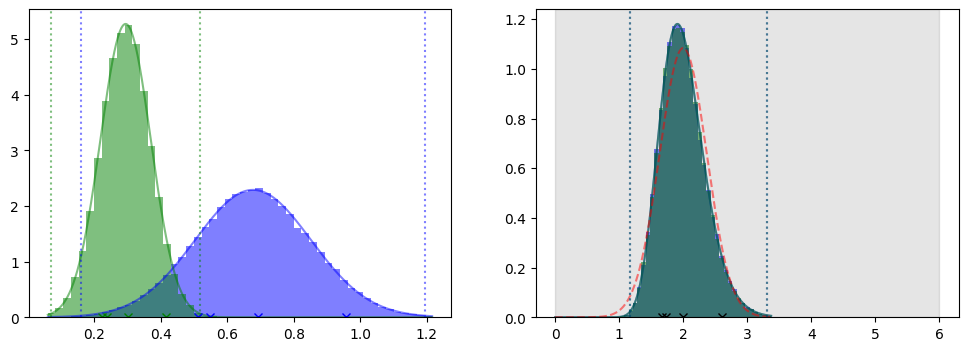

In [426]:
agnostic_bounds = [0,6]
show_prior([1.73, 2.6, 2.0, 1.67], semi_informative_mass=mass, include_norm=1, agnostic_bounds=agnostic_bounds)

<u>Agnostic prior</u>: Linear uniform with bounds **[,]** . 

* 

<u>Informed prior</u>: Lognormal with (mu,sigma) = **(, )**

* Mu and sigma are computed from most likely estimates on similar cooling core clusters_
  - 1.73 for Hydra A (Kuchar). Actually varies between 1.7 and 1.85, depending on tilt angle of cluster north lobe. Take 36, as it is for the "central" tilt 45◦ (estimates vary between 30◦ and 60◦)
  -  2.0 for Hydra A (Vogt1)
  -  1.67 for Hydra A (Vogt2)
  -  2.8 for A2199 (Vacca)